In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [4]:
#load dataset
data=pd.read_csv("C:/Users/Admin/Desktop/ml/student_performance.csv")
data

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,A
1,2,14.0,80.0,2.5,83.9,B
2,3,19.5,86.3,5.3,100.0,A
3,4,25.7,70.2,7.0,100.0,A
4,5,13.4,81.9,6.9,92.0,A
...,...,...,...,...,...,...
999995,999996,18.0,95.5,4.8,100.0,A
999996,999997,15.7,82.7,6.7,88.3,A
999997,999998,14.2,85.1,5.8,87.9,A
999998,999999,25.3,90.0,5.3,100.0,A


In [2]:
data.columns

Index(['student_id', 'weekly_self_study_hours', 'attendance_percentage',
       'class_participation', 'total_score', 'grade'],
      dtype='object')

In [ ]:
#select features and target
X=data[['weekly_self_study_hours','attendance_percentage', 'class_participation']]
y=data['total_score']


In [6]:
#train-test-split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [7]:
#Feature Scaling
Scaler=StandardScaler()
X_train_scaled=Scaler.fit_transform(X_train)
X_test_scaled=Scaler.fit_transform(X_test)

In [8]:
#Model Training
model=LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [9]:
#Predictions
y_pred=model.predict(X_test_scaled)

In [12]:
#Model evaluation
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print("MAE :on average off by:",round(mae,2))
print("MSE :squared mistake value:",round(mse,2))
print("RMSE :final realistic error:",round(rmse,2))
print("R2 :accuracy is :",round(r2,2))


MAE :on average off by: 7.16
MSE :squared mistake value: 81.02
RMSE :final realistic error: 9.0
R2 :accuracy is : 0.66


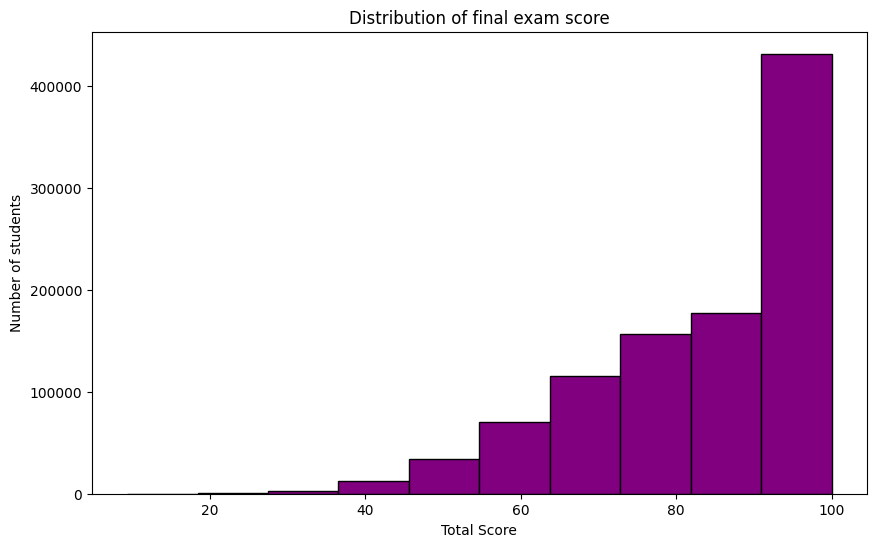

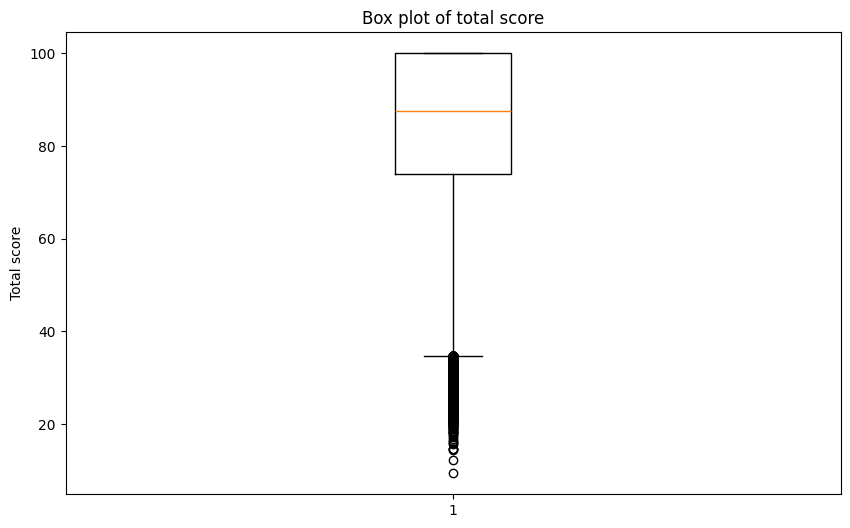

In [18]:
#Data Analysis
#histogram
plt.figure(figsize=(10,6))
plt.hist(data['total_score'],bins=10,color='purple',edgecolor='black')
plt.title("Distribution of final exam score")
plt.xlabel("Total Score")
plt.ylabel('Number of students')
plt.show()

#Box plot
plt.figure(figsize=(10,6))
plt.boxplot(data['total_score'])
plt.title("Box plot of total score")
plt.ylabel('Total score')
plt.show()




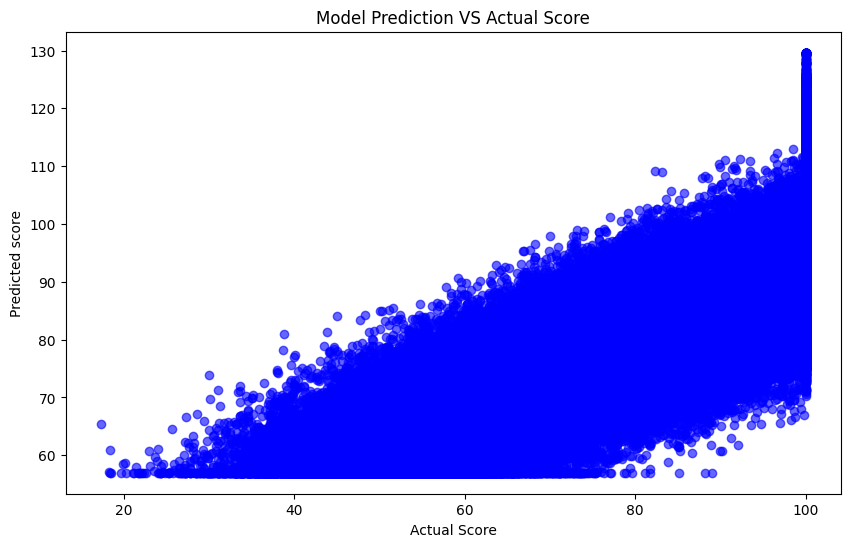

In [24]:
#visualization
#scatter plot
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,alpha=0.6,color='blue')
plt.title("Model Prediction VS Actual Score")
plt.xlabel("Actual Score")
plt.ylabel('Predicted score')
plt.show()


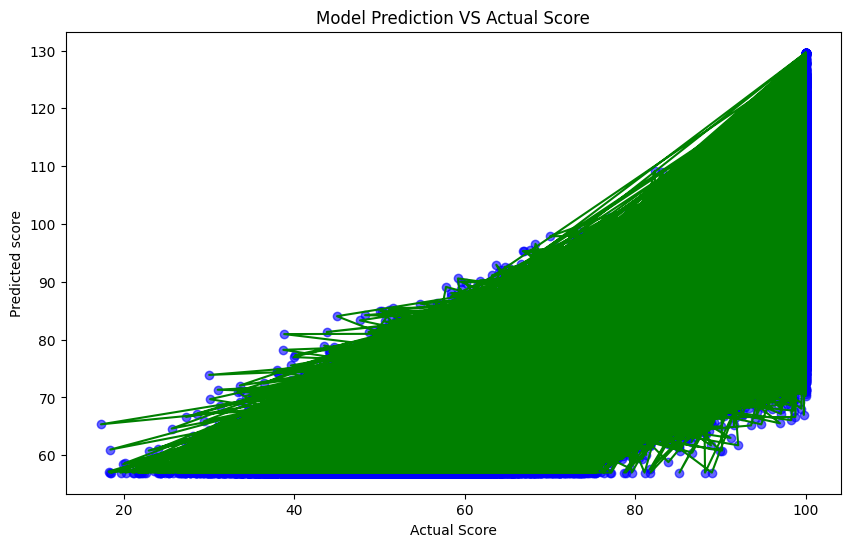

In [23]:
#scatter plot with regression line
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,alpha=0.6,color='blue')
plt.plot(y_test,y_pred,color='green',label='Predicted score(regression line)')
plt.title("Model Prediction VS Actual Score")
plt.xlabel("Actual Score")
plt.ylabel('Predicted score')
plt.show()
